In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


In [31]:
df = pd.read_csv('lynx.csv', index_col = ['time'])

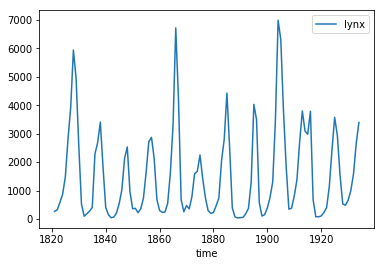

In [5]:
df.plot()
plt.show()

In [19]:
train = df[:100]
test = df[100:]

In [7]:
window_size = 7
def make_model(window_size):
    model = Sequential()
    model.add(Dense(7, input_dim=window_size, init="uniform",
    activation="tanh"))
    model.add(Dense(5, init="uniform", activation="tanh"))
    model.add(Dense(1))
    model.add(Activation("linear"))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


model = make_model(7)
min_max_scaler = preprocessing.MinMaxScaler()
train = np.array(train).reshape(-1,1)

train_scaled = min_max_scaler.fit_transform(train) 

train_X,train_Y = [],[]
for i in range(0 , len(train_scaled) - window_size):
    train_X.append(train_scaled[i:i+window_size])
    train_Y.append(train_scaled[i+window_size])

new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1))
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, input_dim=7, activation="tanh", kernel_initializer="uniform")`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="tanh", kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
model.fit(new_train_X,new_train_Y, nb_epoch=2000, batch_size=512, validation_split = .05)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 88 samples, validate on 5 samples
Epoch 1/2000
88/88 [==============================] - 4s 42ms/step - loss: 0.1056 - val_loss: 0.0596
Epoch 2/2000
88/88 [==============================] - 0s 54us/step - loss: 0.1041 - val_loss: 0.0585
Epoch 3/2000
88/88 [==============================] - 0s 48us/step - loss: 0.1024 - val_loss: 0.0573
Epoch 4/2000
88/88 [==============================] - 0s 48us/step - loss: 0.1006 - val_loss: 0.0561
Epoch 5/2000
88/88 [==============================] - 0s 45us/step - loss: 0.0988 - val_loss: 0.0550
Epoch 6/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0971 - val_loss: 0.0540
Epoch 7/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0953 - val_loss: 0.0529
Epoch 8/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0936 - val_loss: 0.0519
Epoch 9/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0919 - val_loss: 0.0510
Epoch 10/2000
88/88 [===========================

Epoch 81/2000
88/88 [==============================] - 0s 44us/step - loss: 0.0354 - val_loss: 0.0264
Epoch 82/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0350 - val_loss: 0.0259
Epoch 83/2000
88/88 [==============================] - 0s 45us/step - loss: 0.0346 - val_loss: 0.0255
Epoch 84/2000
88/88 [==============================] - 0s 52us/step - loss: 0.0342 - val_loss: 0.0251
Epoch 85/2000
88/88 [==============================] - 0s 52us/step - loss: 0.0339 - val_loss: 0.0247
Epoch 86/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0335 - val_loss: 0.0243
Epoch 87/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0332 - val_loss: 0.0240
Epoch 88/2000
88/88 [==============================] - 0s 45us/step - loss: 0.0328 - val_loss: 0.0237
Epoch 89/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0325 - val_loss: 0.0234
Epoch 90/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0322

Epoch 161/2000
88/88 [==============================] - 0s 44us/step - loss: 0.0236 - val_loss: 0.0244
Epoch 162/2000
88/88 [==============================] - 0s 45us/step - loss: 0.0235 - val_loss: 0.0244
Epoch 163/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0234 - val_loss: 0.0245
Epoch 164/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0234 - val_loss: 0.0246
Epoch 165/2000
88/88 [==============================] - 0s 54us/step - loss: 0.0233 - val_loss: 0.0246
Epoch 166/2000
88/88 [==============================] - 0s 55us/step - loss: 0.0232 - val_loss: 0.0247
Epoch 167/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0231 - val_loss: 0.0248
Epoch 168/2000
88/88 [==============================] - 0s 55us/step - loss: 0.0230 - val_loss: 0.0248
Epoch 169/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0229 - val_loss: 0.0249
Epoch 170/2000
88/88 [==============================] - 0s 50us/step - lo

Epoch 241/2000
88/88 [==============================] - 0s 52us/step - loss: 0.0176 - val_loss: 0.0328
Epoch 242/2000
88/88 [==============================] - 0s 53us/step - loss: 0.0175 - val_loss: 0.0330
Epoch 243/2000
88/88 [==============================] - 0s 53us/step - loss: 0.0175 - val_loss: 0.0331
Epoch 244/2000
88/88 [==============================] - 0s 52us/step - loss: 0.0175 - val_loss: 0.0332
Epoch 245/2000
88/88 [==============================] - 0s 53us/step - loss: 0.0174 - val_loss: 0.0333
Epoch 246/2000
88/88 [==============================] - 0s 52us/step - loss: 0.0174 - val_loss: 0.0335
Epoch 247/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0173 - val_loss: 0.0336
Epoch 248/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0173 - val_loss: 0.0337
Epoch 249/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0173 - val_loss: 0.0338
Epoch 250/2000
88/88 [==============================] - 0s 50us/step - lo

Epoch 321/2000
88/88 [==============================] - 0s 45us/step - loss: 0.0159 - val_loss: 0.0395
Epoch 322/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0159 - val_loss: 0.0395
Epoch 323/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0158 - val_loss: 0.0396
Epoch 324/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0158 - val_loss: 0.0396
Epoch 325/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0158 - val_loss: 0.0396
Epoch 326/2000
88/88 [==============================] - 0s 44us/step - loss: 0.0158 - val_loss: 0.0396
Epoch 327/2000
88/88 [==============================] - 0s 52us/step - loss: 0.0158 - val_loss: 0.0397
Epoch 328/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0158 - val_loss: 0.0397
Epoch 329/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0158 - val_loss: 0.0397
Epoch 330/2000
88/88 [==============================] - 0s 47us/step - lo

Epoch 401/2000
88/88 [==============================] - 0s 45us/step - loss: 0.0155 - val_loss: 0.0403
Epoch 402/2000
88/88 [==============================] - 0s 41us/step - loss: 0.0155 - val_loss: 0.0403
Epoch 403/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0155 - val_loss: 0.0403
Epoch 404/2000
88/88 [==============================] - 0s 41us/step - loss: 0.0155 - val_loss: 0.0403
Epoch 405/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0155 - val_loss: 0.0403
Epoch 406/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0155 - val_loss: 0.0403
Epoch 407/2000
88/88 [==============================] - 0s 41us/step - loss: 0.0155 - val_loss: 0.0403
Epoch 408/2000
88/88 [==============================] - 0s 38us/step - loss: 0.0155 - val_loss: 0.0403
Epoch 409/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0155 - val_loss: 0.0403
Epoch 410/2000
88/88 [==============================] - 0s 46us/step - lo

Epoch 481/2000
88/88 [==============================] - 0s 52us/step - loss: 0.0154 - val_loss: 0.0403
Epoch 482/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0154 - val_loss: 0.0403
Epoch 483/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0154 - val_loss: 0.0403
Epoch 484/2000
88/88 [==============================] - 0s 44us/step - loss: 0.0154 - val_loss: 0.0403
Epoch 485/2000
88/88 [==============================] - 0s 52us/step - loss: 0.0154 - val_loss: 0.0403
Epoch 486/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0154 - val_loss: 0.0403
Epoch 487/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0154 - val_loss: 0.0403
Epoch 488/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0154 - val_loss: 0.0403
Epoch 489/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0154 - val_loss: 0.0403
Epoch 490/2000
88/88 [==============================] - 0s 49us/step - lo

Epoch 561/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0153 - val_loss: 0.0401
Epoch 562/2000
88/88 [==============================] - 0s 52us/step - loss: 0.0153 - val_loss: 0.0401
Epoch 563/2000
88/88 [==============================] - 0s 59us/step - loss: 0.0153 - val_loss: 0.0401
Epoch 564/2000
88/88 [==============================] - 0s 55us/step - loss: 0.0153 - val_loss: 0.0401
Epoch 565/2000
88/88 [==============================] - 0s 53us/step - loss: 0.0153 - val_loss: 0.0401
Epoch 566/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0153 - val_loss: 0.0401
Epoch 567/2000
88/88 [==============================] - 0s 56us/step - loss: 0.0153 - val_loss: 0.0401
Epoch 568/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0153 - val_loss: 0.0401
Epoch 569/2000
88/88 [==============================] - 0s 53us/step - loss: 0.0153 - val_loss: 0.0401
Epoch 570/2000
88/88 [==============================] - 0s 50us/step - lo

Epoch 641/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0153 - val_loss: 0.0399
Epoch 642/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0153 - val_loss: 0.0399
Epoch 643/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0153 - val_loss: 0.0399
Epoch 644/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0153 - val_loss: 0.0399
Epoch 645/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0153 - val_loss: 0.0399
Epoch 646/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0153 - val_loss: 0.0399
Epoch 647/2000
88/88 [==============================] - 0s 53us/step - loss: 0.0153 - val_loss: 0.0399
Epoch 648/2000
88/88 [==============================] - 0s 44us/step - loss: 0.0153 - val_loss: 0.0399
Epoch 649/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0153 - val_loss: 0.0399
Epoch 650/2000
88/88 [==============================] - 0s 49us/step - lo

Epoch 721/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0153 - val_loss: 0.0398
Epoch 722/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0153 - val_loss: 0.0398
Epoch 723/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0153 - val_loss: 0.0398
Epoch 724/2000
88/88 [==============================] - 0s 45us/step - loss: 0.0153 - val_loss: 0.0398
Epoch 725/2000
88/88 [==============================] - 0s 45us/step - loss: 0.0153 - val_loss: 0.0398
Epoch 726/2000
88/88 [==============================] - 0s 45us/step - loss: 0.0153 - val_loss: 0.0398
Epoch 727/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0153 - val_loss: 0.0398
Epoch 728/2000
88/88 [==============================] - 0s 45us/step - loss: 0.0153 - val_loss: 0.0398
Epoch 729/2000
88/88 [==============================] - 0s 45us/step - loss: 0.0153 - val_loss: 0.0398
Epoch 730/2000
88/88 [==============================] - 0s 45us/step - lo

Epoch 801/2000
88/88 [==============================] - 0s 43us/step - loss: 0.0153 - val_loss: 0.0397
Epoch 802/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0153 - val_loss: 0.0397
Epoch 803/2000
88/88 [==============================] - 0s 45us/step - loss: 0.0153 - val_loss: 0.0397
Epoch 804/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0153 - val_loss: 0.0397
Epoch 805/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0153 - val_loss: 0.0397
Epoch 806/2000
88/88 [==============================] - 0s 41us/step - loss: 0.0153 - val_loss: 0.0397
Epoch 807/2000
88/88 [==============================] - 0s 43us/step - loss: 0.0153 - val_loss: 0.0397
Epoch 808/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0153 - val_loss: 0.0397
Epoch 809/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0153 - val_loss: 0.0397
Epoch 810/2000
88/88 [==============================] - 0s 47us/step - lo

Epoch 881/2000
88/88 [==============================] - 0s 61us/step - loss: 0.0153 - val_loss: 0.0396
Epoch 882/2000
88/88 [==============================] - 0s 60us/step - loss: 0.0153 - val_loss: 0.0396
Epoch 883/2000
88/88 [==============================] - 0s 54us/step - loss: 0.0153 - val_loss: 0.0396
Epoch 884/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0153 - val_loss: 0.0396
Epoch 885/2000
88/88 [==============================] - 0s 52us/step - loss: 0.0153 - val_loss: 0.0396
Epoch 886/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0153 - val_loss: 0.0396
Epoch 887/2000
88/88 [==============================] - 0s 52us/step - loss: 0.0153 - val_loss: 0.0396
Epoch 888/2000
88/88 [==============================] - 0s 52us/step - loss: 0.0153 - val_loss: 0.0396
Epoch 889/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0153 - val_loss: 0.0396
Epoch 890/2000
88/88 [==============================] - 0s 40us/step - lo

Epoch 961/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0152 - val_loss: 0.0395
Epoch 962/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0152 - val_loss: 0.0395
Epoch 963/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0152 - val_loss: 0.0395
Epoch 964/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0152 - val_loss: 0.0395
Epoch 965/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0152 - val_loss: 0.0395
Epoch 966/2000
88/88 [==============================] - 0s 41us/step - loss: 0.0152 - val_loss: 0.0395
Epoch 967/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0152 - val_loss: 0.0395
Epoch 968/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0152 - val_loss: 0.0395
Epoch 969/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0152 - val_loss: 0.0395
Epoch 970/2000
88/88 [==============================] - 0s 50us/step - lo

88/88 [==============================] - 0s 48us/step - loss: 0.0152 - val_loss: 0.0393
Epoch 1041/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0152 - val_loss: 0.0393
Epoch 1042/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0152 - val_loss: 0.0393
Epoch 1043/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0152 - val_loss: 0.0393
Epoch 1044/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0152 - val_loss: 0.0393
Epoch 1045/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0152 - val_loss: 0.0392
Epoch 1046/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0152 - val_loss: 0.0392
Epoch 1047/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0152 - val_loss: 0.0392
Epoch 1048/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0152 - val_loss: 0.0392
Epoch 1049/2000
88/88 [==============================] - 0s 50us/step - loss: 0.

Epoch 1119/2000
88/88 [==============================] - 0s 45us/step - loss: 0.0151 - val_loss: 0.0388
Epoch 1120/2000
88/88 [==============================] - 0s 43us/step - loss: 0.0151 - val_loss: 0.0388
Epoch 1121/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0151 - val_loss: 0.0388
Epoch 1122/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0151 - val_loss: 0.0388
Epoch 1123/2000
88/88 [==============================] - 0s 45us/step - loss: 0.0151 - val_loss: 0.0388
Epoch 1124/2000
88/88 [==============================] - 0s 44us/step - loss: 0.0151 - val_loss: 0.0388
Epoch 1125/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0151 - val_loss: 0.0388
Epoch 1126/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0151 - val_loss: 0.0388
Epoch 1127/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0151 - val_loss: 0.0388
Epoch 1128/2000
88/88 [==============================] - 0s 48us

Epoch 1198/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0149 - val_loss: 0.0380
Epoch 1199/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0149 - val_loss: 0.0380
Epoch 1200/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0149 - val_loss: 0.0380
Epoch 1201/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0149 - val_loss: 0.0380
Epoch 1202/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0149 - val_loss: 0.0380
Epoch 1203/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0149 - val_loss: 0.0379
Epoch 1204/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0149 - val_loss: 0.0379
Epoch 1205/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0149 - val_loss: 0.0379
Epoch 1206/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0149 - val_loss: 0.0379
Epoch 1207/2000
88/88 [==============================] - 0s 56us

Epoch 1277/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0145 - val_loss: 0.0366
Epoch 1278/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0145 - val_loss: 0.0366
Epoch 1279/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0145 - val_loss: 0.0366
Epoch 1280/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0145 - val_loss: 0.0366
Epoch 1281/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0145 - val_loss: 0.0365
Epoch 1282/2000
88/88 [==============================] - 0s 53us/step - loss: 0.0145 - val_loss: 0.0365
Epoch 1283/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0145 - val_loss: 0.0365
Epoch 1284/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0145 - val_loss: 0.0365
Epoch 1285/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0145 - val_loss: 0.0364
Epoch 1286/2000
88/88 [==============================] - 0s 47us

Epoch 1356/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0141 - val_loss: 0.0350
Epoch 1357/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0141 - val_loss: 0.0350
Epoch 1358/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0141 - val_loss: 0.0349
Epoch 1359/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0141 - val_loss: 0.0349
Epoch 1360/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0141 - val_loss: 0.0349
Epoch 1361/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0141 - val_loss: 0.0349
Epoch 1362/2000
88/88 [==============================] - 0s 44us/step - loss: 0.0141 - val_loss: 0.0349
Epoch 1363/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0141 - val_loss: 0.0349
Epoch 1364/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0141 - val_loss: 0.0348
Epoch 1365/2000
88/88 [==============================] - 0s 45us

Epoch 1435/2000
88/88 [==============================] - 0s 42us/step - loss: 0.0139 - val_loss: 0.0339
Epoch 1436/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0139 - val_loss: 0.0339
Epoch 1437/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0139 - val_loss: 0.0339
Epoch 1438/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0139 - val_loss: 0.0339
Epoch 1439/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0139 - val_loss: 0.0339
Epoch 1440/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0139 - val_loss: 0.0338
Epoch 1441/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0139 - val_loss: 0.0338
Epoch 1442/2000
88/88 [==============================] - 0s 45us/step - loss: 0.0139 - val_loss: 0.0338
Epoch 1443/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0139 - val_loss: 0.0338
Epoch 1444/2000
88/88 [==============================] - 0s 47us

Epoch 1514/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0138 - val_loss: 0.0335
Epoch 1515/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0138 - val_loss: 0.0335
Epoch 1516/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0138 - val_loss: 0.0335
Epoch 1517/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0138 - val_loss: 0.0335
Epoch 1518/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0138 - val_loss: 0.0335
Epoch 1519/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0138 - val_loss: 0.0335
Epoch 1520/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0138 - val_loss: 0.0335
Epoch 1521/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0138 - val_loss: 0.0335
Epoch 1522/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0138 - val_loss: 0.0335
Epoch 1523/2000
88/88 [==============================] - 0s 52us

Epoch 1593/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0137 - val_loss: 0.0335
Epoch 1594/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0137 - val_loss: 0.0335
Epoch 1595/2000
88/88 [==============================] - 0s 55us/step - loss: 0.0137 - val_loss: 0.0335
Epoch 1596/2000
88/88 [==============================] - 0s 55us/step - loss: 0.0137 - val_loss: 0.0335
Epoch 1597/2000
88/88 [==============================] - 0s 53us/step - loss: 0.0137 - val_loss: 0.0335
Epoch 1598/2000
88/88 [==============================] - 0s 53us/step - loss: 0.0137 - val_loss: 0.0335
Epoch 1599/2000
88/88 [==============================] - 0s 54us/step - loss: 0.0137 - val_loss: 0.0335
Epoch 1600/2000
88/88 [==============================] - 0s 61us/step - loss: 0.0137 - val_loss: 0.0335
Epoch 1601/2000
88/88 [==============================] - 0s 52us/step - loss: 0.0137 - val_loss: 0.0335
Epoch 1602/2000
88/88 [==============================] - 0s 53us

Epoch 1672/2000
88/88 [==============================] - 0s 44us/step - loss: 0.0137 - val_loss: 0.0335
Epoch 1673/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0137 - val_loss: 0.0335
Epoch 1674/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0137 - val_loss: 0.0335
Epoch 1675/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0137 - val_loss: 0.0335
Epoch 1676/2000
88/88 [==============================] - 0s 52us/step - loss: 0.0137 - val_loss: 0.0335
Epoch 1677/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0137 - val_loss: 0.0335
Epoch 1678/2000
88/88 [==============================] - 0s 40us/step - loss: 0.0137 - val_loss: 0.0335
Epoch 1679/2000
88/88 [==============================] - 0s 56us/step - loss: 0.0137 - val_loss: 0.0335
Epoch 1680/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0137 - val_loss: 0.0335
Epoch 1681/2000
88/88 [==============================] - 0s 51us

Epoch 1751/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0136 - val_loss: 0.0336
Epoch 1752/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0136 - val_loss: 0.0336
Epoch 1753/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0136 - val_loss: 0.0336
Epoch 1754/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0136 - val_loss: 0.0336
Epoch 1755/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0136 - val_loss: 0.0336
Epoch 1756/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0136 - val_loss: 0.0336
Epoch 1757/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0136 - val_loss: 0.0336
Epoch 1758/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0136 - val_loss: 0.0336
Epoch 1759/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0136 - val_loss: 0.0336
Epoch 1760/2000
88/88 [==============================] - 0s 47us

Epoch 1830/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0135 - val_loss: 0.0338
Epoch 1831/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0135 - val_loss: 0.0338
Epoch 1832/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0135 - val_loss: 0.0338
Epoch 1833/2000
88/88 [==============================] - 0s 45us/step - loss: 0.0135 - val_loss: 0.0338
Epoch 1834/2000
88/88 [==============================] - 0s 44us/step - loss: 0.0135 - val_loss: 0.0338
Epoch 1835/2000
88/88 [==============================] - 0s 42us/step - loss: 0.0135 - val_loss: 0.0338
Epoch 1836/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0135 - val_loss: 0.0338
Epoch 1837/2000
88/88 [==============================] - 0s 43us/step - loss: 0.0135 - val_loss: 0.0338
Epoch 1838/2000
88/88 [==============================] - 0s 45us/step - loss: 0.0135 - val_loss: 0.0338
Epoch 1839/2000
88/88 [==============================] - 0s 45us

Epoch 1909/2000
88/88 [==============================] - 0s 53us/step - loss: 0.0134 - val_loss: 0.0339
Epoch 1910/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0134 - val_loss: 0.0339
Epoch 1911/2000
88/88 [==============================] - 0s 53us/step - loss: 0.0134 - val_loss: 0.0339
Epoch 1912/2000
88/88 [==============================] - 0s 58us/step - loss: 0.0134 - val_loss: 0.0339
Epoch 1913/2000
88/88 [==============================] - 0s 53us/step - loss: 0.0134 - val_loss: 0.0339
Epoch 1914/2000
88/88 [==============================] - 0s 52us/step - loss: 0.0134 - val_loss: 0.0339
Epoch 1915/2000
88/88 [==============================] - 0s 52us/step - loss: 0.0133 - val_loss: 0.0339
Epoch 1916/2000
88/88 [==============================] - 0s 52us/step - loss: 0.0133 - val_loss: 0.0339
Epoch 1917/2000
88/88 [==============================] - 0s 51us/step - loss: 0.0133 - val_loss: 0.0340
Epoch 1918/2000
88/88 [==============================] - 0s 50us

Epoch 1988/2000
88/88 [==============================] - 0s 50us/step - loss: 0.0132 - val_loss: 0.0342
Epoch 1989/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0132 - val_loss: 0.0342
Epoch 1990/2000
88/88 [==============================] - 0s 48us/step - loss: 0.0132 - val_loss: 0.0342
Epoch 1991/2000
88/88 [==============================] - 0s 45us/step - loss: 0.0132 - val_loss: 0.0342
Epoch 1992/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0132 - val_loss: 0.0342
Epoch 1993/2000
88/88 [==============================] - 0s 49us/step - loss: 0.0132 - val_loss: 0.0342
Epoch 1994/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0132 - val_loss: 0.0342
Epoch 1995/2000
88/88 [==============================] - 0s 47us/step - loss: 0.0132 - val_loss: 0.0342
Epoch 1996/2000
88/88 [==============================] - 0s 46us/step - loss: 0.0132 - val_loss: 0.0342
Epoch 1997/2000
88/88 [==============================] - 0s 47us

In [43]:
train = df[:100]['lynx']
test = list(df[100:]['lynx'])

In [44]:
test

[229, 399, 1132, 2432, 3574, 2935, 1537, 529, 485, 662, 1000, 1590, 2657, 3396]

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


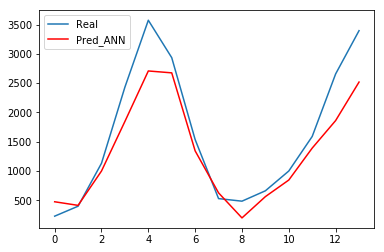

Test MSE: 203111.355


In [46]:
test_extended = train.tolist()[-1*window_size:] + test
test_data = []
for i in test_extended:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data).reshape(-1,1)
test_scaled = min_max_scaler.fit_transform(test_data)
test_X,test_Y = [],[]
for i in range(0 , len(test_scaled) - window_size):
    test_X.append(test_scaled[i:i+window_size])
    test_Y.append(test_scaled[i+window_size])
    new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)
#new_test_X = np.reshape(new_test_X, (new_test_X.shape[0], new_test_X.shape[1], 1))
predictions = model.predict(new_test_X)
predictions_rescaled=min_max_scaler.inverse_transform(predictions)
Y = pd.DataFrame(test)
pred = pd.DataFrame(predictions_rescaled)
plt.plot(Y,label = 'Real')
plt.plot(pred , color = 'r', label = 'Pred_ANN')
#p.plot()
plt.legend()
plt.show()
error = mse(test,predictions_rescaled)
print('Test MSE: %.3f' % error)

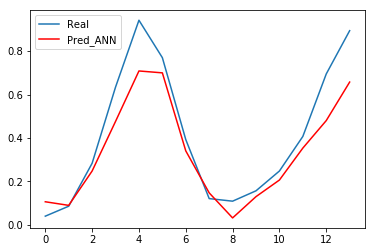

Test MSE: 0.015


In [54]:
plt.plot(test_scaled[-14:],label = 'Real')
plt.plot(predictions, color = 'r', label = 'Pred_ANN')
#p.plot()
plt.legend()
plt.show()
error = mse(test_scaled[-14:], predictions)
print('Test MSE: %.3f' % error)

In [55]:
np.savetxt('lynx_train_X.csv', new_train_X)
np.savetxt('lynx_train_Y.csv', new_train_Y)
np.savetxt('lynx_test_X.csv', new_test_X)
np.savetxt('lynx_predictions_ann.csv', predictions)
np.savetxt('lynx_test_Y.csv', test_scaled[-14:])